### The mission:

Apply the algorithm from the paper to a simple, well-undesrtood physical system:
**the quantum harmonic oscilator**
Specically, implement a quantum algorithm to solve:

$$y''+\omega²y = 0, \quad y(0)= 1, \quad y'(0)=1, \quad \omega=1$$

Once implemented, **use the resulting quantum state** to evaluate the **system's kinetic and potential energies as a function of time** in the interval  $[0,1]$.

Explore **how varying algorithmic parameters**, such as the bounds used in `inplace_prepare_state()`, **affects the accuracy of these energy values**.

Finally, analyze how resource-efficient your implementation is by comparing circuit depth and width under different optimization settings.

### Problem cited from the paper
> The description of the problem for solving LDEs is as follows.
> A unknown vector $x(t)$ starts from a $x(0)$ and follows an evolution described by and LDE 
> $$\frac{dx(t)}{dt} = Mx(t) + b,$$
> where where $M$ is an arbitrary $N\times N$ matrix, while $b$ and $x(t)$ are $N$-dimenional vectors

We known that the analytical solution of the equation can be written as $$x(t) = e^{Mt} x(0) + (e^{Mt} - I)M^{-1}b $$


### Algorithm presented in the paper

Unlike the classic computing which solve the equation is aproximately $O(N³)$ this algorithm already requires $O(log N)$ time. In other words this quantum algorithm is faster than the other algorithm in classic computing.

Finding $x(t)$ based on our quantum algorithm. By Taylor expansion, the solution x(t) is approximately

$$x(t) \approx \sum$$

### Harmonic Oscilator Equation
We have $$y'' + \omega^2y = 0$$ we knonw that $\omega = 1$
$$y'' + y = 0$$
But the algorithm presented by paper is only enable for linear differential equations with the form: $$\frac{dx(t)}{dt} = Mx(t) + b$$

Can we define a vector state $$x(t) = \begin{pmatrix} x_1(t) \\ x_2(t) \end{pmatrix}$$
where:
$$\begin{matrix} x_1(t) & = & y(t) & \text{which represents the position} \\ x_2(t) & = & y'(t) & \text{which represents the volicity} \end{matrix}$$

### Derivation of the matricial system
Now, let $x(t)$ be the vector that change with the time.

First component: $$\frac{dx_1(t)}{dt} = y'(t) $$ But we knew the definition above that $y'(t) = x_2(t)$. Therefore $$x'_1(t) = x_2(t)$$

Secondth component: $$\frac{dx_2(t)}{dt} = y''(t) $$ Usign our original differential equation $$y'' + y=0 \rightarrow y'' = -y$$ And we knew that $y = x_1$, we have $$x'_2(t) = -x_1(t)$$

Now both equations in the matricial equation:
$$\begin{pmatrix} x'_1(t) \\ x'_2(t) \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} \begin{pmatrix} x_1(t) \\ x_2(t) \end{pmatrix} $$

### Replacement in the Xin et al. Algorithm 
we have $$\frac{dx(t)}{dt} = Mx(t) + b$$
where
$$
\begin{matrix}
M & = & \begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix} \\[.5cm]
b & = & \begin{pmatrix} 0 \\ 0 \end{pmatrix} \\[.5cm]
x(0) & = & \begin{pmatrix} 1 \\ 1 \end{pmatrix} \\
\end{matrix}
$$

From the paper the algorithm is:
$$
x(t) \approx \sum^k_{m=0} \frac{(Mt)^m}{m!} x(0) + \sum^k_{n=1}\frac{M^{n-1}t^n}{n!}b
$$
we choose $k = 4$

We have $$x(t)\approx \sum^4_{m=0} \frac{(Mt)^m}{m!}x(0) $$
The algorithm requires computed the power of $M^m$. We note that matrix $M$ is proportional to quantum gate of Pauly-Y ($\sigma_y$):
$$
    \sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} 
    \rightarrow M = i\sigma_y
$$

Now, we have

$$
\begin{matrix}
    M^0 & = & I \\
    M^1 & = & i\sigma_y \\
    M^2 & = & (i\sigma_y)^2 & =&  -I \\
    M³ & = & -i\sigma_y \\
    M^4 & = & I

\end{matrix}
$$

This meaning that the power of M are cyclics and $k=3$ is better chose than $k=4$

### Quantum States
The module of our initial vector is $||x(0)|| = \sqrt{1^2 +1²} = \sqrt 2$

The vector $x(0)$ can be described by quantum states 
$$
\ket{x(0)} = \frac{1}{\sqrt 2} 
\begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt 2}\ket 0 + \frac{1}{\sqrt 2}\ket 1  
$$

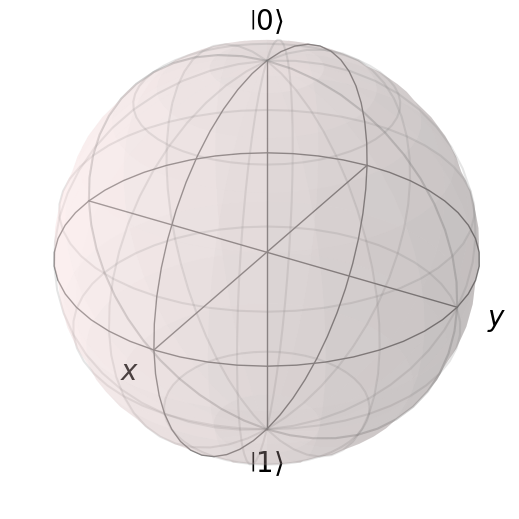

In [1]:
from qutip import *
b = Bloch()
b.show()